# 互评作业二：网页浏览行为关联规则挖掘

## 代码仓库：https://github.com/Eason17/DataMining

### 姓名：黄奕棋<br><br>学号：3220220923


### 任务介绍
本次任务旨在通过分析用户在网站上的浏览行为数据，深入挖掘潜在的跳转规律，以提供有关网站导航结构优化的有益建议。通过运用先进的数据分析技术，该脚本能够准确地捕捉用户的浏览习惯和偏好，从而揭示用户在网站上的导航行为模式。借助这些洞察力，网站管理员可以了解用户如何导航并找到感兴趣的内容，以便进一步优化网站的布局和导航结构。

脚本的分析结果和建议可以为网站管理员提供有关如何改进用户体验和增加页面转化率的有价值信息。例如，脚本可以识别出用户经常访问的页面、最常点击的链接以及在浏览过程中的跳转路径。基于这些数据，脚本可以建议调整导航菜单、重点突出关键内容、优化页面布局，以便更好地满足用户需求并提升网站的整体性能。


In [4]:
# 本次任务中会使用到efficient_apriori库
!pip install efficient_apriori

Defaulting to user installation because normal site-packages is not writeable


### 1. 数据预处理: 清洗数据，处理缺失值，提取用户浏览记录。

对于缺失值的处理，若用户浏览的网页不存在，那么就直接进行丢弃。

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori
Paired_Attributes = {}
Attributes = []
Case = []
all_visit = {}
current_case = None
lost_count = 0
with open('anonymous-msweb.data') as data:
    for line in data.readlines():
        line=line.split(',')
        if line[0]=='A':
            Paired_Attributes[line[1]] = line[3:]
            Attributes.append(line[1])
        elif line[0]=='C':
            Case.append([])
        elif line[0]=='V':
            ### 缺失值处理，不在Attribute中的列舍弃
            if line[1] not in Attributes:
                lost_count += 1
                continue
            Case[-1].append(line[1])
            if line[1] in all_visit.keys():
                all_visit[line[1]] += 1
            else:
                all_visit[line[1]] = 1
lost_count

0

### 2. 数据探索性分析：根据上述数据加载与预处理结果，分析最常被访问的页面、页面访问量分布等。

In [7]:
sorted_all_vis=sorted(all_visit.items(), key = lambda kv: kv[1],reverse=True)
print(sorted_all_vis[:10])
for i in range(10):
    print(eval(Paired_Attributes[sorted_all_vis[i][0]][0])) 
x = [sorted_all_vis[i][0] for i in range(10)]
y = [sorted_all_vis[i][1] for i in range(10)]

[('1008', 10836), ('1034', 9383), ('1004', 8463), ('1018', 5330), ('1017', 5108), ('1009', 4628), ('1001', 4451), ('1026', 3220), ('1003', 2968), ('1025', 2123)]
Free Downloads
Internet Explorer
Microsoft.com Search
isapi
Products 
Windows Family of OSs
Support Desktop
Internet Site Construction for Developers
Knowledge Base
Web Site Builder's Gallery


上述代码罗列出了访问量前十名的网页，为了直观展示出访问量的趋势，这里绘制了折线图。

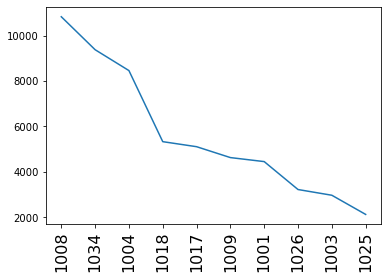

In [8]:
plt.plot(x,y)
plt.xticks(rotation=90, fontsize=16)
plt.show()

### 3.  关联规则挖掘: 使用Apriori算法，根据用户浏览记录计算频繁项集和关联规则。

In [19]:
# 本次任务中会使用到apyori库
!pip install apyori

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=029cc443a9f3fad2f006d0d28cb2de8dec4a0d869922d238c4b78d0d64bc08a8
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [20]:
import apyori

itemsets, rules = apriori(Case, min_support=0.05,  min_confidence=0)
ap = list(apyori.apriori(transactions=Case, min_support=0.01,min_confidence=0, min_lift=0))

### 4. 结果评估: 在分析关联规则之后，我们需要对这些规则进行评估，以确定哪些规则是强关联规则。

在评估过程中，我们会计算关联规则的支持度、置信度和提升度，并使用Lift和卡方作为额外的评价指标。

- 支持度（Support）衡量了一个规则在数据集中出现的频率。支持度高表示规则在数据集中出现的频率较高。支持度计算公式为：支持度(R) = (R在数据集中出现的次数) / (数据集的总记录数)。支持度的取值范围是0到1之间，支持度越高表示规则的出现越频繁。


- 置信度（Confidence）衡量了规则中后项在前项条件下出现的概率。置信度高表示后项在给定前项的条件下出现的概率较高。置信度计算公式为：置信度(R) = (R在数据集中出现的次数) / (前项在数据集中出现的次数)。置信度的取值范围是0到1之间，置信度越高表示规则的可靠性越高。


- 提升度（Lift）用于衡量规则中后项出现的相对概率。提升度高表示后项相对于前项的出现概率较高。提升度计算公式为：提升度(R) = (置信度(R)) / (支持度(后项))。提升度的取值范围大于等于1，提升度等于1表示后项与前项之间没有关联，大于1表示正向关联，小于1表示负向关联。


- Lift（提升度）是一种常用的评估指标，它衡量了规则中后项的出现概率相对于前项独立出现的概率的提升程度。Lift的计算公式为：Lift(R) = (支持度(R)) / (支持度(前项) * 支持度(后项))。Lift的取值范围大于等于1，Lift等于1表示后项与前项之间没有关联，大于1表示正向关联，小于1表示负向关联。


- 卡方（Chi-square）是另一种常用的评估指标，它衡量了观察到的规则频数与期望频数之间的差异程度。卡方值越大表示观察到的规则频数与期望频数之间的差异越大，规则的关联性越显著。

In [21]:
supports = []
confidences = []
lifts = []
bases = []
adds = []

for r in ap:
    for x in r.ordered_statistics:
        supports.append(r.support)
        confidences.append(x.confidence)
        lifts.append(x.lift)
        bases.append(list(x.items_base))
        adds.append(list(x.items_add))

result = pd.DataFrame({
    'support':supports,
    'confidence':confidences,
    'lift':lifts,
    'base':bases,
    'add':adds
})

res = result[(result.lift > 0.0) & (result.support > 0.1) & (result.confidence > 0.1)]
res = res.reset_index(drop=True)   #重置索引
print('*'*32)
print('results of package apyori')
print('*'*32)
print(res)

print('*'*32)
print('results of package efficient_apyori')
print('*'*32)
for i in range(len(rules)):
    print(rules[i])

********************************
results of package apyori
********************************
    support  confidence      lift    base           add
0  0.136070    0.136070  1.000000      []        [1001]
1  0.258720    0.258720  1.000000      []        [1004]
2  0.331265    0.331265  1.000000      []        [1008]
3  0.141481    0.141481  1.000000      []        [1009]
4  0.156155    0.156155  1.000000      []        [1017]
5  0.162942    0.162942  1.000000      []        [1018]
6  0.286845    0.286845  1.000000      []        [1034]
7  0.160802    0.160802  1.000000      []  [1008, 1034]
8  0.160802    0.485419  1.692267  [1008]        [1034]
9  0.160802    0.560588  1.692267  [1034]        [1008]
********************************
results of package efficient_apyori
********************************
{1003} -> {1001} (conf: 0.608, supp: 0.055, lift: 4.472, conv: 2.207)
{1001} -> {1003} (conf: 0.406, supp: 0.055, lift: 4.472, conv: 1.530)
{1018} -> {1001} (conf: 0.365, supp: 0.059, lift: 

### 5.  结果分析与应用: 分析得到的关联规则，为网站提供导航结构优化建议，以提升用户体验。

根据以上的结果可知，根据支持度、置信度和提升度的计算，我们找到了几个强关联规则。其中，{1034} -> {1008}和{1008} -> {1034}分别表示"Free Downloads -> Internet Explorer"以及"Internet Explorer -> Free Downloads"。

基于这些结果，我们提出以下优化建议：在"Free Downloads"和"Internet Explorer"的页面上添加彼此的链接。通过在这两个页面之间添加跳转链接，可以帮助用户更方便地导航和访问相关内容，提升用户体验。

此外，还有一些规则如{1003} -> {1001}，{1009} -> {1008}，{1018} -> {1008}，{1001} -> {1018}，{1001} -> {1003}，它们的置信度较高。对于这些规则，我们也建议在相应的页面上添加相应的跳转链接，以提供更直接和方便的访问路径给用户。

通过优化页面结构并添加相关的跳转链接，我们可以增强网站的导航体系，提高用户的导航效率，进而提升用户满意度和整体网站性能。

### 6. 必要的可视化展示

以下给出efficient_apyori下的support和confidence、support和lift关系的散点图。

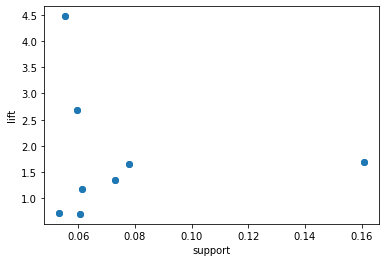

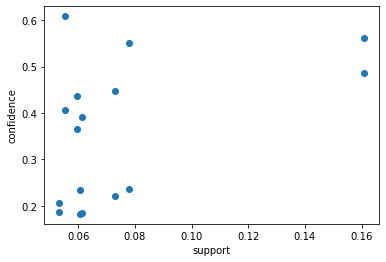

In [22]:
supp = []
lift = []
conf = []
for i in range(len(rules)):
    supp.append(rules[i].support)
    lift.append(rules[i].lift)
    conf.append(rules[i].confidence)
plt.xlabel('support')
plt.ylabel('lift')
plt.scatter(supp,lift)
plt.show()
plt.clf()
plt.xlabel('support')
plt.ylabel('confidence')
plt.scatter(supp,conf)
plt.show()